# Exploratory Data Analysis (EDA) for Walmart Sales Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Set display options for better visibility
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv('../data/processed/feature_engineered_sales.csv', parse_dates=['date'])




# Numerical Analysis


In [27]:
# Preview top 5 rows
df.head()


,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,weekday,is_weekend,is_holiday,holiday_name,store_name,lag_1,lag_2,lag_4,lag_13,lag_26,lag_52,sales_roll_4,sales_roll_13,sales_roll_26,sales_roll_52,cumulative_sales,sales_diff_1,sales_diff_4,avg_sales_per_store,promo_last_week,promo_next_week,store_encoded
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,6,True,0,No Holiday,Mesa West,0.00,0.00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1643690.90,0.00,0.00,1.601845e+06,0.0,0.0,0
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,3,False,0,No Holiday,Mesa West,1643690.90,0.00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,3285648.34,-1733.46,0.00,1.601845e+06,0.0,0.0,0
2,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,0,False,0,No Holiday,Mesa West,1641957.44,1643690.90,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,4840455.02,-87150.76,0.00,1.601845e+06,0.0,0.0,0
3,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,2010,12,3,4,False,0,No Holiday,Mesa West,1554806.68,1641957.44,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,6279996.61,-115265.09,0.00,1.601845e+06,0.0,0.0,0
4,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2010,2,4,3,False,0,No Holiday,Mesa West,1439541.59,1554806.68,1643690.9,0.0,0.0,0.0,1.569999e+06,0.0,0.0,0.0,7874964.89,155426.69,-48722.62,1.601845e+06,0.0,0.0,0


In [37]:
# Check unique values for categorical/ID columns safely
categorical_cols = ['store', 'is_holiday', 'month', 'weekday']

unique_values = {}
for col in categorical_cols:
    if col in df.columns:
        unique_values[col] = df[col].nunique()
    else:
        unique_values[col] = "❌ Column not found"

# Display results in a table
import pandas as pd
unique_df = pd.DataFrame(list(unique_values.items()), columns=["Column", "Unique Values"])
display(unique_df)


,Column,Unique Values
0,store,45
1,is_holiday,2
2,month,12
3,weekday,7


In [53]:
# Summary


# Count 
non_nulls = df.count()

# Missing Values
missing_counts = df.isnull().sum()

# Duplicate Rows
duplicate_rows = df.duplicated().sum()

# Stats
num_cols = df.select_dtypes(include='number').columns
means = df[num_cols].mean()
medians = df[num_cols].median()
stds = df[num_cols].std()
dtypes = df[num_cols].dtypes

# Table
summary_df = pd.DataFrame({
    'Column': num_cols,
    'Data Type': dtypes.values,
    'Non-Null Count': non_nulls[num_cols].values,
    'Missing Values': missing_counts[num_cols].values,
    'Mean': means.round(2).values,
    'Median': medians.round(2).values,
    'Std Dev': stds.round(2).values,
     'Skewness': df[num_cols].skew(),
    'Kurtosis': df[num_cols].kurtosis()
})


# Display
print(f"📌 Duplicate Rows: {duplicate_rows}")
display(summary_df)

# Dataset Shape
shape_data = {
    "Rows": [df.shape[0]],
    "Columns": [df.shape[1]]
}
shape_df = pd.DataFrame(shape_data, index=["Dataset Shape"])
print("📊 Dataset Shape")
display(shape_df)

📌 Duplicate Rows: 0


,Column,Data Type,Non-Null Count,Missing Values,Mean,Median,Std Dev,Skewness,Kurtosis
store,store,int64,2565,0,23.00,23.00,12.99,0.000000,-1.201188
weekly_sales,weekly_sales,float64,2565,0,1059871.95,981345.20,557383.10,0.487995,-0.742206
holiday_flag,holiday_flag,int64,2565,0,0.11,0.00,0.31,2.573984,4.629004
temperature,temperature,float64,2565,0,59.59,61.10,19.07,-0.260733,-0.732725
fuel_price,fuel_price,float64,2565,0,3.33,3.42,0.46,-0.071055,-1.204003
cpi,cpi,float64,2565,0,171.39,182.60,39.29,0.063058,-1.841544
unemployment,unemployment,float64,2565,0,8.02,7.91,1.88,1.202300,2.667348
year,year,int64,2565,0,2010.93,2011.00,0.79,0.125252,-1.394888
month,month,int64,2565,0,6.56,6.00,3.46,0.015787,-1.254100
day,day,int64,2565,0,6.49,6.00,3.26,0.064478,-1.176090


📊 Dataset Shape


,Rows,Columns
Dataset Shape,2565,33


In [ ]:
# Weekly Sales Summary by Store
store_weekly_summary = df.groupby('store_name')['weekly_sales'].agg(
    Mean='mean',
    Median='median',
    Std_Dev='std',
    Min='min',
    Max='max'
).round(2).reset_index()

store_weekly_summary


,store_name,Mean,Median,Std_Dev,Min,Max
0,Albuquerque South,379781.83,380188.69,60419.48,277137.86,489372.02
1,Atlanta Downtown,1588921.57,1569304.40,131430.55,1328468.89,1903385.14
2,Austin East,923150.81,921161.20,54147.02,804105.49,1069061.63
3,Baltimore Central,1468691.88,1462731.93,107915.82,1224175.99,1799070.98
4,Charlotte East,523923.46,524483.65,20118.58,479195.02,583835.18
5,Charlotte Metro,965963.38,964356.74,44032.12,865709.11,1091020.37
6,Charlotte South,2075189.47,2078417.47,224425.65,1639585.61,2623469.95
7,Columbus Uptown,1998168.43,1995994.51,139551.51,1744544.39,2462779.06
8,Dallas Downtown,1017965.71,1011822.30,74937.88,850936.26,1199330.85
9,Denver North,267338.97,270373.05,25277.79,209986.25,326870.13


In [63]:
# Monthly Sales Summary by Store

# Step 1: Create a 'month' column if not already present
df['month'] = df['date'].dt.to_period('M')  # e.g., '2025-07'

# Step 2: Aggregate sales per store per month
monthly_sales = df.groupby(['store_name', 'month'])['weekly_sales'].sum().reset_index()

# Step 3: Compute stats for each store across all months
store_monthly_summary = monthly_sales.groupby('store_name')['weekly_sales'].agg(
    Mean='mean',
    Median='median',
    Std_Dev='std',
    Min='min',
    Max='max'
    ).round(2).reset_index()

# Step 4: Display full summary
store_monthly_summary


,store_name,Mean,Median,Std_Dev,Min,Max
0,Albuquerque South,601321.24,469400.03,306936.06,277137.86,1353610.54
1,Atlanta Downtown,2515792.48,1701062.90,1173987.20,1328468.89,5111830.29
2,Austin East,1461655.44,959170.49,691441.24,804105.49,2855135.32
3,Baltimore Central,2325428.81,1508043.66,1114277.70,1308977.05,4494675.01
4,Charlotte East,829545.47,544678.57,392085.53,479195.02,1667333.03
5,Charlotte Metro,1529442.01,990684.05,721257.03,865709.11,3052732.90
6,Charlotte South,3285716.66,2306585.76,1583066.78,1639585.61,6939432.17
7,Columbus Uptown,3163766.69,2123280.24,1449094.82,1765584.48,6322347.89
8,Dallas Downtown,1611779.04,1099720.02,772551.31,850936.26,3183261.17
9,Denver North,423286.70,303321.32,197330.84,224294.39,879847.77


# Graphical Analysis

In [73]:
# Weekly Sales Over Time

sample_stores = df['store_name'].unique()[:10]  

sample_df = df[df['store_name'].isin(sample_stores)]
sample_df = sample_df.groupby(['store_name', 'date'])['weekly_sales'].sum().reset_index()

fig = px.line(sample_df, x='date', y='weekly_sales', color='store_name', facet_col='store_name',
              facet_col_wrap=2, title='Weekly Sales Over Time by Store')
fig.update_layout(height=800)
fig.show()


In [ ]:
# Monthly Sales across all stores

df['month'] = df['date'].dt.to_period('M').astype(str)

monthly_sales = df.groupby('month')['weekly_sales'].sum().reset_index()
monthly_sales.rename(columns={'weekly_sales': 'monthly_sales'}, inplace=True)

fig = px.line(monthly_sales, x='month', y='monthly_sales', title='Monthly Sales Trend')
fig.update_layout(xaxis_title='Month', yaxis_title='Total Monthly Sales')
fig.show()


In [79]:
# Sales by day of weeek

df['weekday'] = df['date'].dt.day_name()
weekday_sales = df.groupby('weekday')['weekly_sales'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig = px.bar(weekday_sales, x=weekday_sales.index, y='weekly_sales',
             title='Average Sales by Weekday', labels={'weekday': 'Day', 'weekly_sales': 'Sales'})
fig.show()


In [ ]:
# Total Sales by Store

import plotly.express as px

# Group by store name and convert sales to millions
store_sales = df.groupby('store_name')['weekly_sales'].sum().sort_values(ascending=True)
store_sales_millions = store_sales / 1e6  # Convert to millions

# Create bar chart
fig = px.bar(
    x=store_sales_millions.values,
    y=store_sales_millions.index,
    orientation='h',
    title='Total Sales by Store (in Millions)',
    labels={'x': 'Total Sales (Millions)', 'y': 'Store Name'},
    hover_name=store_sales_millions.index  # This ensures store name shows on hover
)

# Improve layout
fig.update_layout(
    yaxis=dict(tickfont=dict(size=10)),
    xaxis_tickformat=".1f",
    height=900,
    margin=dict(l=150, r=40, t=60, b=40)
)

fig.show()


In [88]:
df['holiday_label'] = df['holiday_flag'].map({1: 'Holiday', 0: 'Non-Holiday'})

# Aggregate weekly sales by date and holiday label
grouped = df.groupby(['date', 'holiday_label'])['weekly_sales'].sum().reset_index()

fig = px.line(
    grouped, 
    x='date', 
    y='weekly_sales', 
    color='holiday_label',
    title='Holiday vs Non-Holiday Sales Over Time',
    labels={'weekly_sales': 'Total Weekly Sales', 'holiday_label': 'Week Type'}
)
fig.show()



In [91]:
fig = px.scatter(df, x='fuel_price', y='weekly_sales',
                 title='Fuel Price vs Weekly Sales', trendline='ols')
fig.show()


In [92]:
fig = px.scatter(df, x='unemployment', y='weekly_sales',
                 title='Unemployment Rate vs Weekly Sales', trendline='ols')
fig.show()


In [93]:
fig = px.scatter(df, x='temperature', y='weekly_sales',
                 title='Temperature vs Weekly Sales', trendline='ols')
fig.show()


In [94]:
fig = px.scatter(df, x='unemployment', y='weekly_sales',
                 title='Unemployment Rate vs Weekly Sales', trendline='ols')
fig.show()


In [101]:




selected_cols = [
    'weekly_sales',
    'holiday_flag',
    'temperature',
    'fuel_price',
    'cpi',
    'unemployment',
    'is_weekend',
    'is_holiday'
]


filtered_df = df[selected_cols].dropna()


corr_matrix = filtered_df.corr().round(2)


fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    zmin=-1, zmax=1,
    title="🔍 Interactive Correlation Heatmap of Key Features"
)

fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Features",
    title_x=0.5,
    height=600,
    margin=dict(l=80, r=40, t=60, b=40)
)

fig.show()


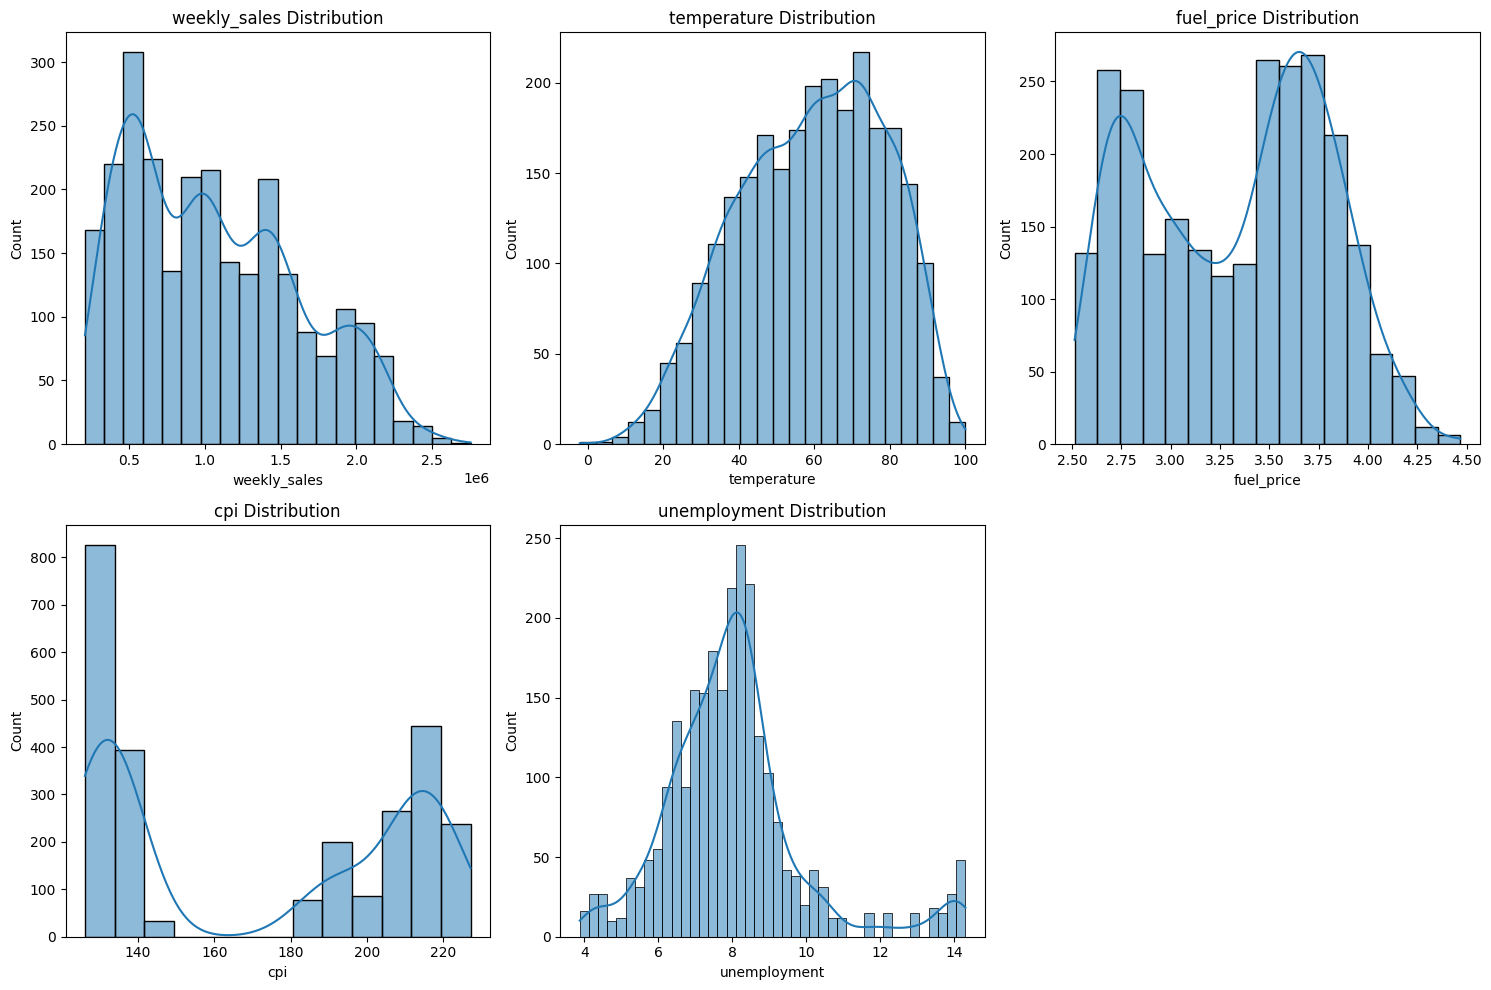

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


In [7]:
# Check if 'date' is already in index
if 'date' not in df.columns:
    df.reset_index(inplace=True)

# Now ensure 'date' is datetime and set it as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [6]:
# Ensure 'date' is datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# --------------------------------
# Decompose Overall Weekly Sales
# --------------------------------
weekly_sales = df['weekly_sales'].resample('W').sum()

result = seasonal_decompose(weekly_sales, model='additive', period=52)

plt.figure(figsize=(14, 10))
result.plot()
plt.suptitle('⏱️ Time Series Decomposition of Weekly Sales', fontsize=16)
plt.tight_layout()
plt.show()

# --------------------------------
# Optional: Decompose per store
# --------------------------------
def decompose_store(store_id):
    df_store = df[df['store'] == store_id]
    weekly = df_store['weekly_sales'].resample('W').sum()
    
    if len(weekly) >= 52:
        result = seasonal_decompose(weekly, model='additive', period=52)
        result.plot()
        plt.suptitle(f'Store {store_id} - Time Series Decomposition', fontsize=14)
        plt.tight_layout()
        plt.show()
    else:
        print(f"⚠️ Not enough data to decompose store {store_id}.")


KeyError: 'date'

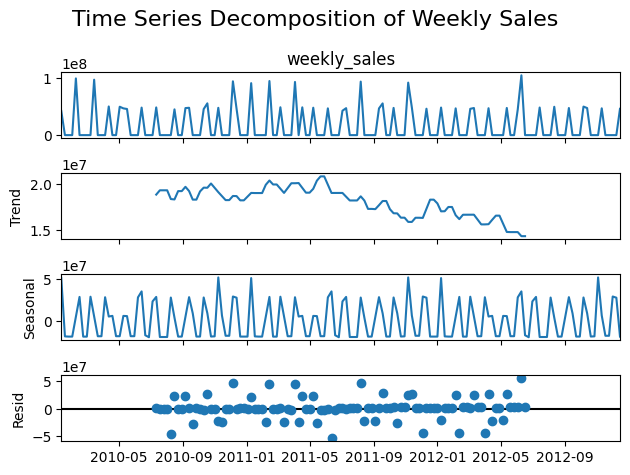

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose overall sales
weekly_sales = df['weekly_sales'].resample('W').sum()
result = seasonal_decompose(weekly_sales, model='additive', period=52)

# Plot

result.plot()
plt.suptitle('Time Series Decomposition of Weekly Sales', fontsize=16)
plt.tight_layout()
plt.show()
